In [31]:
import numpy
import matplotlib
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [32]:
ldor0=1024
filename='f4.nu'
fid = open(filename, 'rb')

# numpy function 
pole=np.fromfile(fid,dtype='float32',count=ldor0)
print(pole[0])
#fid.seek(4*ldor0,os.SEEK_SET)
#pole=np.fromfile(fid,dtype='float32',count=ldor0)
#print(pole[0])


4096.0


In [33]:
kpars = int(pole[50])
nh = int(pole[59]); 
print('nh=',nh)

ddolgs = pole[55]
dtets = pole[56]
print('dtets=',dtets)

ids = int(360.1 / ddolgs)
its = int(180.1 / dtets + 1); print its


ntr = int(pole[57])
ddolgt = pole[53]; print ('ddolgt=',ddolgt,ntr)
idt = int(360.1 / ddolgt)

nl = int(pole[60])
nl2 = nl + nl + 3; print nl2
#-------------------------------------------------------------------------------
size_zap = (ntr * idt * nl2)
#size_zap=43*ldor0 # potential
print size_zap
#potef = fread(fid, mcat([size_zap + 1]), mstring('float'))
print(int((ntr * idt * nl2)/ldor0))


('nh=', 30)
('dtets=', 5.0)
37
('ddolgt=', 5.0, 16)
37
42624
41


In [34]:
#fid.seek(4*ldor0,os.SEEK_SET)
potef=fromfile(fid,dtype='float32',count=size_zap)

fid.seek(4*(43*ldor0),os.SEEK_SET)
size_zap = kpars * nh * its * ids
pgl0 = fromfile(fid,dtype='float32',count=size_zap)
fid.close()
print(potef[0],potef[ntr * idt * nl2-1],pgl0[0])

#-------------------------------------------------------------------------------


(-3.7687837e+11, -2.7769399e+11, 4.4485543e+13)


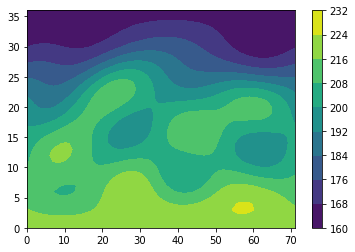

In [35]:
pgl = pgl0.reshape(ids,its,nh,kpars)
pgl_ris=zeros(its*ids).reshape(ids,its)
pgl_ris[:,:] = pgl[:, :, 0,6] # temperature at 80 km
    #[X,Y]=meshgrid(its,ids);
contourf(pgl_ris.T)
colorbar()